In [6]:
import pandas as pd
import glob
import os

In [8]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_driving_demo.csv'

# Read the CSV file into a DataFrame
all_var_df= pd.read_csv(file_path)

In [9]:
all_var_df.head()

,Subject,Data Point Index,True Label,Predicted Label,Training Accuracy,Test Accuracy,Best Hyperparameters
0,RWRAD_001,0,1,1,0.932622,1.0,"{'subsample': 0.8, 'reg_lambda': 10, 'reg_alph..."
1,RWRAD_001,1,1,1,0.932622,1.0,"{'subsample': 0.8, 'reg_lambda': 10, 'reg_alph..."
2,RWRAD_001,2,1,1,0.932622,1.0,"{'subsample': 0.8, 'reg_lambda': 10, 'reg_alph..."
3,RWRAD_001,3,1,1,0.932622,1.0,"{'subsample': 0.8, 'reg_lambda': 10, 'reg_alph..."
4,RWRAD_001,4,1,1,0.932622,1.0,"{'subsample': 0.8, 'reg_lambda': 10, 'reg_alph..."


In [66]:
all_var_df['Subject'].nunique()

119

In [68]:
# Assuming the DataFrame is named `df` and the relevant columns are 'subj' for the subject and 'True_Label' for the label

# Group by 'subj' (subject) and check unique values in 'True_Label' for each subject
unique_label_counts = all_var_df.groupby('Subject')['True Label'].nunique()

# Count how many subjects have more than one unique value for 'True_Label'
subjects_with_multiple_labels = (unique_label_counts > 1).sum()

# Print the result
print(f"Number of subjects with more than 1 unique value for True Label: {subjects_with_multiple_labels}")


Number of subjects with more than 1 unique value for True Label: 1


In [70]:
# Assuming the DataFrame is named `df` and the relevant columns are 'subj' for the subject and 'True_Label' for the label

# Group by 'subj' and check how many unique values exist for 'True_Label'
unique_label_counts = all_var_df.groupby('Subject')['True Label'].nunique()

# Get the subjects where the number of unique labels is greater than 1
subjects_with_multiple_labels = unique_label_counts[unique_label_counts > 1].index

# Print the subjects with more than 1 unique value for True Label
print("Subjects with more than 1 unique value for True Label:")
print(subjects_with_multiple_labels)


Subjects with more than 1 unique value for True Label:
Index(['RWRAD_065'], dtype='object', name='Subject')


In [72]:
import pandas as pd

# Assuming the DataFrame is named `df` with columns 'subj', 'True_Label', and 'Predicted_Label'

# Group by 'subj' to summarize data for each subject
summary_df = all_var_df.groupby('Subject').agg(
    num_data_points=('Subject', 'size'),
    true_label=('True Label', lambda x: x.iloc[0] if len(x.unique()) == 1 else 'Multiple'),  # Repeat or mark 'Multiple' if more than 1 unique True_Label
    num_predicted_1=('Predicted Label', lambda x: (x == 1).sum()),  # Count of Predicted_Label == 1
    num_predicted_0=('Predicted Label', lambda x: (x == 0).sum())  # Count of Predicted_Label == 0
)

# Add a column for Final_call: 1 if num_predicted_1 > num_predicted_0, otherwise 0
summary_df['Final_call'] = (summary_df['num_predicted_1'] > summary_df['num_predicted_0']).astype(int)

# Reset index to make 'subj' a regular column again (for easier viewing)
summary_df.reset_index(inplace=True)



In [74]:
summary_df.head(65)

,Subject,num_data_points,true_label,num_predicted_1,num_predicted_0,Final_call
0,RWRAD_001,14,1,14,0,1
1,RWRAD_002,13,0,7,6,1
2,RWRAD_003,12,0,12,0,1
3,RWRAD_004,14,0,14,0,1
4,RWRAD_005,14,0,0,14,0
...,...,...,...,...,...,...
60,RWRAD_063,5,1,5,0,1
61,RWRAD_064,12,0,12,0,1
62,RWRAD_065,13,Multiple,6,7,0
63,RWRAD_066,15,0,6,9,0


In [76]:
len(summary_df)

119

In [121]:
import pandas as pd

# Assuming `expanded_summary_df` is your DataFrame
# Remove rows where the 'true_label' is "Multiple"
filtered_df = summary_df[summary_df['true_label'] != 'Multiple']

# Create a new column to check if True_Label matches Final_Call
filtered_df['correct_prediction'] = filtered_df['true_label'] == filtered_df['Final_call']

# Calculate accuracy by dividing the number of correct predictions by the total number of data points
accuracy = filtered_df['correct_prediction'].sum() / len(filtered_df)

# Calculate the count of correct predictions
correct_prediction_count = filtered_df['correct_prediction'].sum()

# Print the accuracy and the count of correct predictions
print(f"Accuracy: {accuracy:.4f}")
print(f"Count of Correct Predictions: {correct_prediction_count}")


Accuracy: 0.6695
Count of Correct Predictions: 79


C:\Users\aparnaj8\AppData\Local\Temp\ipykernel_43968\1470613799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['correct_prediction'] = filtered_df['true_label'] == filtered_df['Final_call']


In [123]:
filtered_df.head()

,Subject,num_data_points,true_label,num_predicted_1,num_predicted_0,Final_call,correct_prediction
0,RWRAD_001,14,1,14,0,1,True
1,RWRAD_002,13,0,7,6,1,False
2,RWRAD_003,12,0,12,0,1,False
3,RWRAD_004,14,0,14,0,1,False
4,RWRAD_005,14,0,0,14,0,True


In [125]:
import pandas as pd

# Create variables for True Positives, False Positives, False Negatives, and True Negatives
tp = ((filtered_df['true_label'] == 1) & (filtered_df['Final_call'] == 1)).sum()
fp = ((filtered_df['true_label'] == 0) & (filtered_df['Final_call'] == 1)).sum()
fn = ((filtered_df['true_label'] == 1) & (filtered_df['Final_call'] == 0)).sum()
tn = ((filtered_df['true_label'] == 0) & (filtered_df['Final_call'] == 0)).sum()

# Calculate Precision, Recall, and F1 Score
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Avoid division by zero
recall = tp / (tp + fn) if (tp + fn) != 0 else 0  # Avoid division by zero
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0  # Avoid division by zero

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Precision: 0.7143
Recall: 0.7639
F1 Score: 0.7383


In [131]:
filtered_df['prediction_ratio_roc'] = filtered_df['num_predicted_1'] / filtered_df['num_data_points']


C:\Users\aparnaj8\AppData\Local\Temp\ipykernel_43968\2200530149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['prediction_ratio_roc'] = filtered_df['num_predicted_1'] / filtered_df['num_data_points']


In [133]:
print(filtered_df[['true_label', 'prediction_ratio_roc']].isnull().sum())


true_label              0
prediction_ratio_roc    0
dtype: int64


In [135]:
filtered_df['prediction_ratio_roc'].unique()

array([1.        , 0.53846154, 0.        , 0.8125    , 0.3125    ,
       0.14285714, 0.57142857, 0.83333333, 0.78571429, 0.69230769,
       0.85714286, 0.42857143, 0.5       , 0.33333333, 0.93333333,
       0.66666667, 0.21428571, 0.11111111, 0.35714286, 0.9375    ,
       0.15384615, 0.63636364, 0.92857143, 0.73333333, 0.4       ,
       0.64285714, 0.07692308, 0.07142857, 0.84615385, 0.92307692,
       0.76923077, 0.6       , 0.53333333, 0.875     , 0.86666667,
       0.29411765, 0.71428571, 0.28571429, 0.8       , 0.88888889])

In [137]:
filtered_df.head()

,Subject,num_data_points,true_label,num_predicted_1,num_predicted_0,Final_call,correct_prediction,prediction_ratio_roc
0,RWRAD_001,14,1,14,0,1,True,1.000000
1,RWRAD_002,13,0,7,6,1,False,0.538462
2,RWRAD_003,12,0,12,0,1,False,1.000000
3,RWRAD_004,14,0,14,0,1,False,1.000000
4,RWRAD_005,14,0,0,14,0,True,0.000000


In [139]:
print(filtered_df['true_label'].unique())  # Should show [0, 1]
print(filtered_df['prediction_ratio_roc'].dtype)  # Should be float64 or similar


[1 0]
float64


In [145]:
filtered_df['true_label'] = filtered_df['true_label'].astype(int)


C:\Users\aparnaj8\AppData\Local\Temp\ipykernel_43968\2028149415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['true_label'] = filtered_df['true_label'].astype(int)


In [149]:
filtered_df['prediction_ratio_roc'] = pd.to_numeric(filtered_df['prediction_ratio_roc'], errors='coerce')


C:\Users\aparnaj8\AppData\Local\Temp\ipykernel_43968\2545829750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['prediction_ratio_roc'] = pd.to_numeric(filtered_df['prediction_ratio_roc'], errors='coerce')


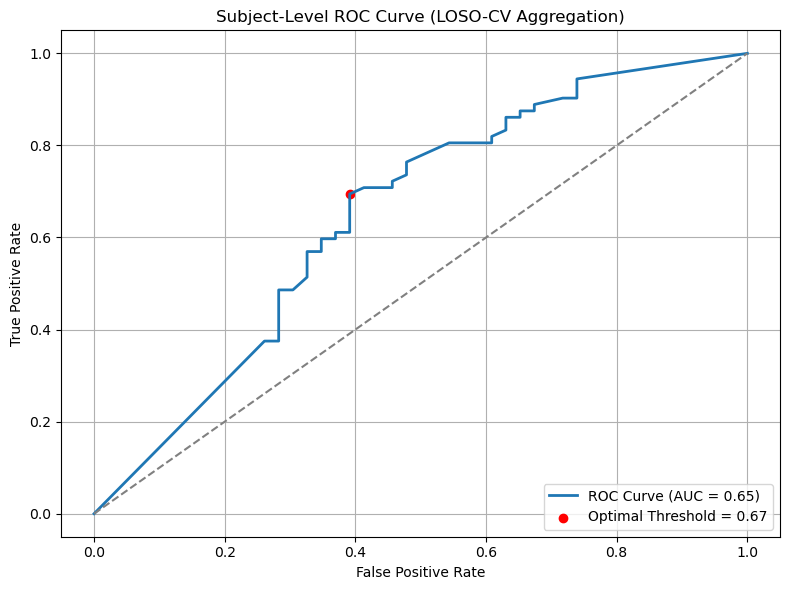

In [151]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Extract labels and predicted scores
y_true = filtered_df['true_label'].values
y_score = filtered_df['prediction_ratio_roc'].values

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Find optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = float(thresholds[optimal_idx])  # Convert to float

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red',
            label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Subject-Level ROC Curve (LOSO-CV Aggregation)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
